In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns
import sys
sys.path.append("../") 

from src.eda_plotting import regplot_grid, draw_scatter_plot, swarm_grid
from src.ml.train_evaluate_save_ml_model import TrainEvaluateSaveMlModel
from src.full_factorial_design_space_generator import FullFactorialDesignSpaceGenerator
from src.ml.ml_model_predictor import MlModelPredictor
from src.ml.tsne_visualiser import TSNEVisualiser

In [2]:
df  = pd.read_csv('../data/processed/candy-data-processed.csv')
print('data shape', df.shape)
df.head()

data shape (85, 13)


,CandyName,Chocolate,Fruity,Caramel,PeanutyAlmondy,Nougat,CrispedRiceWafer,Hard,Bar,PluriBus,SugarPercent,PricePercent,WinPercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
# Categorize the variables
Target          = "WinPercent"
FlavorFeats     = ["Chocolate", "Fruity", "Caramel", "PeanutyAlmondy", "Nougat", "CrispedRiceWafer"]
FormFeats       = ["Hard", "Bar", "PluriBus"]
ContinuousFeats = ["SugarPercent", "PricePercent"]
Features        = FlavorFeats + FormFeats + ContinuousFeats
BooleanFeats    = FlavorFeats + FormFeats

In [4]:
lr_model_pipeline = TrainEvaluateSaveMlModel(features=Features, target=Target, data=df, 
                                             plotting=False, verbose=True, 
                                             model_file_name='../outputs/models/lr/model.joblib',
                                             scaler_file_name='../outputs/models/lr/scaler.joblib',
                                             combined_model_file_name='../outputs/models/lr/combined_model.joblib')
lr_model_experiment = lr_model_pipeline.run('linear_reg')

Cross Validation
R2 score [-0.29293492  0.48173206  0.0272407   0.09513001  0.57874123]
MAPE [35.00620452 19.9914588  16.48302341 18.10430463 13.35554051]
MAE [13.30012934  7.77312275 10.15565717  9.64600901  7.5133755 ]
STDAE [15.35757358  9.07477974 11.45326553 11.5697241   9.04386126]
     metric    average  std devs
0  R2 score   0.177982  0.317560
1      MAPE  20.588106  7.530850
2       MAE   9.677659  2.081497
3     STDAE  11.299841  2.306595


In [5]:
gpr_model_pipeline = TrainEvaluateSaveMlModel(features=Features, target=Target, data=df, 
                                             plotting=False, verbose=True, 
                                             model_file_name='../outputs/models/gpr/model.joblib',
                                             scaler_file_name='../outputs/models/gpr/scaler.joblib',
                                             combined_model_file_name='../outputs/models/gpr/combined_model.joblib')
gpr_model_experiment = gpr_model_pipeline.run('gpr')

[                                        ] | 0% Completed | 1.16 ms

[##########                              ] | 25% Completed | 4.78 s ms

c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[####################                    ] | 50% Completed | 5.03 s

c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[##########################              ] | 66% Completed | 5.46 s

c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[####################################    ] | 91% Completed | 5.67 s

c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001.

[########################################] | 100% Completed | 5.77 s
[########################################] | 100% Completed | 647.24 ms
best parameters {'alpha': 0.1, 'kernel': 1**2 + RBF(length_scale=5) + WhiteKernel(noise_level=1), 'n_restarts_optimizer': 10, 'normalize_y': True, 'random_state': 123}
best score 0.29048877662055367
Cross Validation


c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001.

R2 score [0.00698939 0.35369063 0.18366631 0.43541118 0.58378782]
MAPE [31.62578214 24.33873053 14.28755554 14.39719478 14.45355296]
MAE [10.63014499  8.85954802  8.92622179  7.71679384  7.82323588]
STDAE [12.75095014  9.09613931  9.25930118  9.13373468  9.28652166]
     metric    average  std devs
0  R2 score   0.312709  0.200168
1      MAPE  19.820563  7.051368
2       MAE   8.791189  1.048420
3     STDAE   9.905329  1.424639


c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [6]:
feature_max_dict = {'Chocolate': 1, 'Fruity': 1, 'Caramel': 1, 'PeanutyAlmondy': 1, 'Nougat': 1, 'CrispedRiceWafer': 1,
                    'Hard': 1, 'Bar': 1, 'PluriBus': 1,
                    'SugarPercent': 1, 'PricePercent': 1}
feature_min_dict = {'Chocolate': 0, 'Fruity': 0, 'Caramel': 0, 'PeanutyAlmondy': 0, 'Nougat': 0, 'CrispedRiceWafer': 0,
                    'Hard': 0, 'Bar': 0, 'PluriBus': 0,
                    'SugarPercent': 0, 'PricePercent': 0}
feature_step_dict = {'Chocolate': 1, 'Fruity': 1, 'Caramel': 1, 'PeanutyAlmondy': 1, 'Nougat': 1, 'CrispedRiceWafer': 1,
                    'Hard': 1, 'Bar': 1, 'PluriBus': 1,
                    'SugarPercent': 0.1, 'PricePercent': 0.1}
design_space_generator = FullFactorialDesignSpaceGenerator(features=Features,
                                                            feature_max_dict=feature_max_dict,
                                                            feature_min_dict=feature_min_dict,
                                                            feature_step_dict=feature_step_dict)
design_space_generator.compute_design_space_size()

61952

In [7]:
design_space =design_space_generator.generate_design_space_df()
design_space.describe()

,Chocolate,Fruity,Caramel,PeanutyAlmondy,Nougat,CrispedRiceWafer,Hard,Bar,PluriBus,SugarPercent,PricePercent
count,61952.000000,61952.000000,61952.000000,61952.000000,61952.000000,61952.000000,61952.000000,61952.000000,61952.000000,61952.00000,61952.00000
mean,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.50000,0.50000
std,0.500004,0.500004,0.500004,0.500004,0.500004,0.500004,0.500004,0.500004,0.500004,0.31623,0.31623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.20000,0.20000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.50000,0.50000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.80000,0.80000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [8]:
design_space.loc[:, ['LR_Pred_WinPercent']] = MlModelPredictor().predict(design_space, Features, lr_model_experiment.model, 
                           lr_model_experiment.standard_scaler)

c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
design_space.loc[:, 'GPR_Pred_WinPercent'], design_space.loc[:,'GPR_Pred_WinPercent_Std'] = MlModelPredictor().predict(design_space, Features, gpr_model_experiment.model, 
                           gpr_model_experiment.standard_scaler, return_std=True)

c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


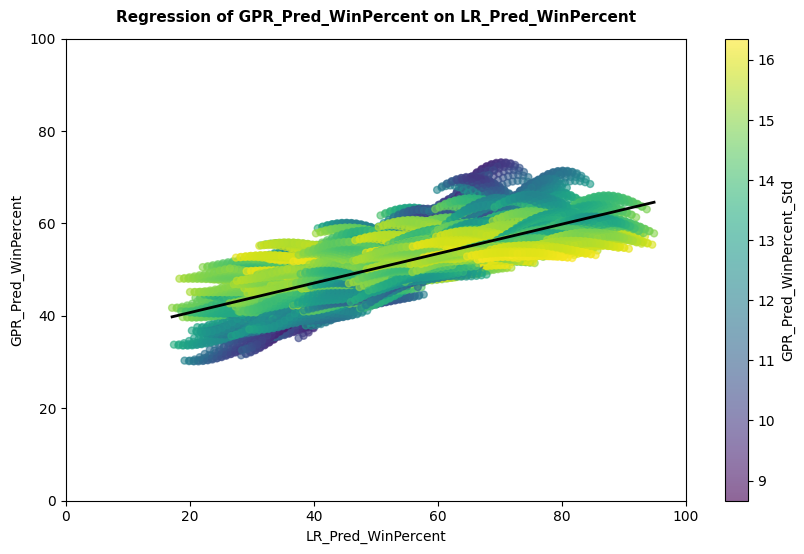

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
draw_scatter_plot(ax, design_space, 'LR_Pred_WinPercent', 'GPR_Pred_WinPercent', 
                  'GPR_Pred_WinPercent_Std', cmap="viridis")

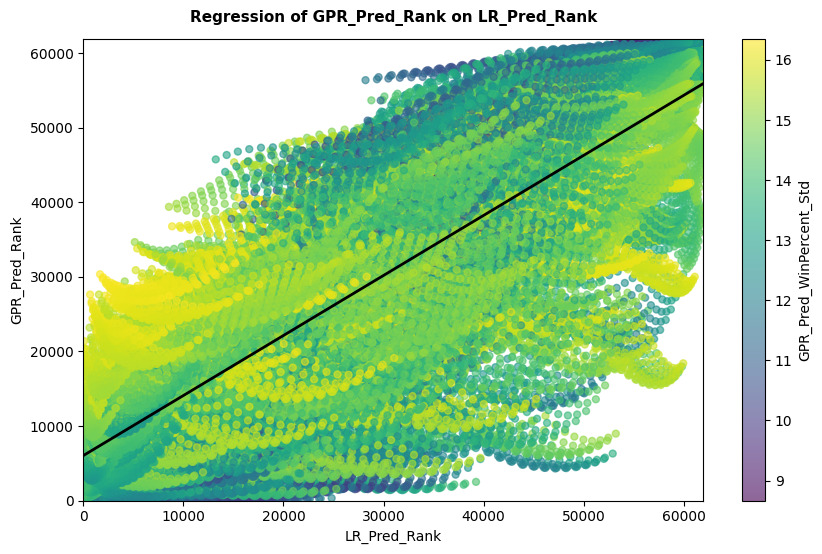

In [11]:
design_space['GPR_Pred_Rank'] = design_space['GPR_Pred_WinPercent'].rank(ascending=False)
design_space['LR_Pred_Rank'] = design_space['LR_Pred_WinPercent'].rank(ascending=False)
fig, ax = plt.subplots(figsize=(10,6))
draw_scatter_plot(ax, design_space, 'LR_Pred_Rank', 'GPR_Pred_Rank', 'GPR_Pred_WinPercent_Std',
                cmap="viridis", x_lim=(0, design_space.shape[0]), y_lim=(0, design_space.shape[0]))

In [12]:
design_space.sort_values(by='GPR_Pred_Rank', inplace=True)
design_space.head(10)

,Chocolate,Fruity,Caramel,PeanutyAlmondy,Nougat,CrispedRiceWafer,Hard,Bar,PluriBus,SugarPercent,PricePercent,LR_Pred_WinPercent,GPR_Pred_WinPercent,GPR_Pred_WinPercent_Std,GPR_Pred_Rank,LR_Pred_Rank
34953,1,0,0,1,0,0,0,0,0,0.9,0.6,70.241135,73.191801,9.777524,1.0,10306.0
34952,1,0,0,1,0,0,0,0,0,0.9,0.5,70.951626,73.188171,9.896448,2.0,9515.0
34941,1,0,0,1,0,0,0,0,0,0.8,0.5,70.137268,73.157162,9.728554,3.0,10422.0
34942,1,0,0,1,0,0,0,0,0,0.8,0.6,69.426777,73.103605,9.620621,4.0,11259.0
34964,1,0,0,1,0,0,0,0,0,1.0,0.6,71.055493,73.050658,10.013690,5.0,9404.0
34963,1,0,0,1,0,0,0,0,0,1.0,0.5,71.765984,72.996760,10.137343,6.0,8654.0
34930,1,0,0,1,0,0,0,0,0,0.7,0.5,69.322910,72.909087,9.626515,7.0,11381.0
34940,1,0,0,1,0,0,0,0,0,0.8,0.4,70.847759,72.904727,9.947729,8.0,9633.0
34954,1,0,0,1,0,0,0,0,0,0.9,0.7,69.530644,72.894186,9.782347,9.0,11138.0
34951,1,0,0,1,0,0,0,0,0,0.9,0.4,71.662117,72.883159,10.127352,10.0,8766.0


In [13]:
design_space.sort_values(by='LR_Pred_Rank', inplace=True)
design_space.head(10)

,Chocolate,Fruity,Caramel,PeanutyAlmondy,Nougat,CrispedRiceWafer,Hard,Bar,PluriBus,SugarPercent,PricePercent,LR_Pred_WinPercent,GPR_Pred_WinPercent,GPR_Pred_WinPercent_Std,GPR_Pred_Rank,LR_Pred_Rank
59158,1,1,1,1,0,1,0,0,0,1.0,0.0,94.881544,57.837144,14.960376,9002.0,1.0
61094,1,1,1,1,1,1,0,0,0,1.0,0.0,94.582952,55.386219,15.919282,17480.0,2.0
59159,1,1,1,1,0,1,0,0,0,1.0,0.1,94.171053,58.336558,14.764838,7710.0,3.0
59147,1,1,1,1,0,1,0,0,0,0.9,0.0,94.067186,58.307845,14.846016,7781.0,4.0
61095,1,1,1,1,1,1,0,0,0,1.0,0.1,93.872461,55.722410,15.828233,16040.0,5.0
61083,1,1,1,1,1,1,0,0,0,0.9,0.0,93.768594,55.680452,15.867008,16209.0,6.0
51414,1,1,0,1,0,1,0,0,0,1.0,0.0,93.705327,63.045214,14.816207,1604.0,7.0
59160,1,1,1,1,0,1,0,0,0,1.0,0.2,93.460562,58.764692,14.582063,6679.0,8.0
53350,1,1,0,1,1,1,0,0,0,1.0,0.0,93.406735,57.167112,15.913081,10948.0,9.0
59148,1,1,1,1,0,1,0,0,0,0.9,0.1,93.356695,58.822686,14.640202,6530.0,10.0


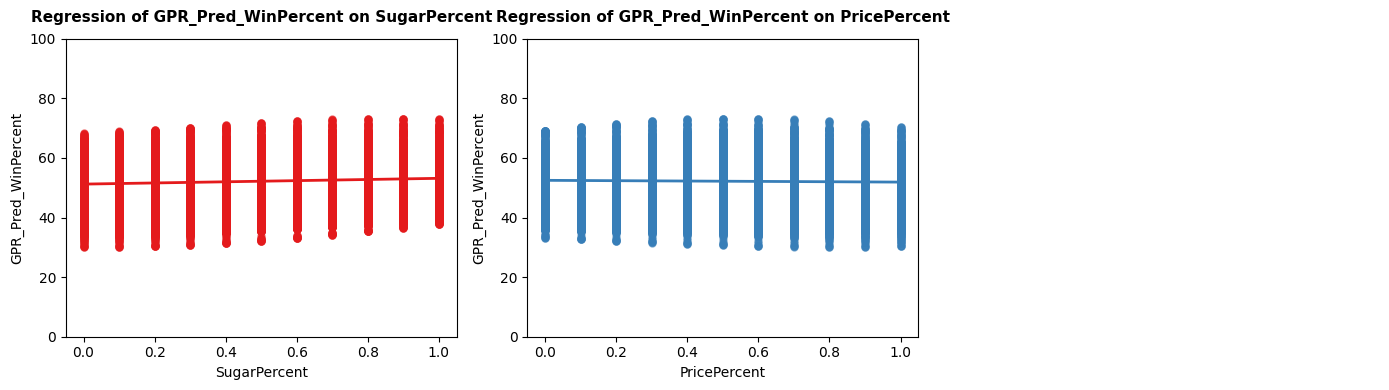

In [14]:
palette = sns.color_palette("Set1", n_colors=len(ContinuousFeats))
colors_dict = {
    col: palette[i]
    for i, col in enumerate(ContinuousFeats)
}
limits = {"SugarPercent":[-0.05,1.05], "PricePercent":[-0.05,1.05]}
regplot_grid(design_space, ContinuousFeats, 'GPR_Pred_WinPercent', 
             colors_dict, x_limits_dict=limits, y_limits_dict={"GPR_Pred_WinPercent":[0, 100]})

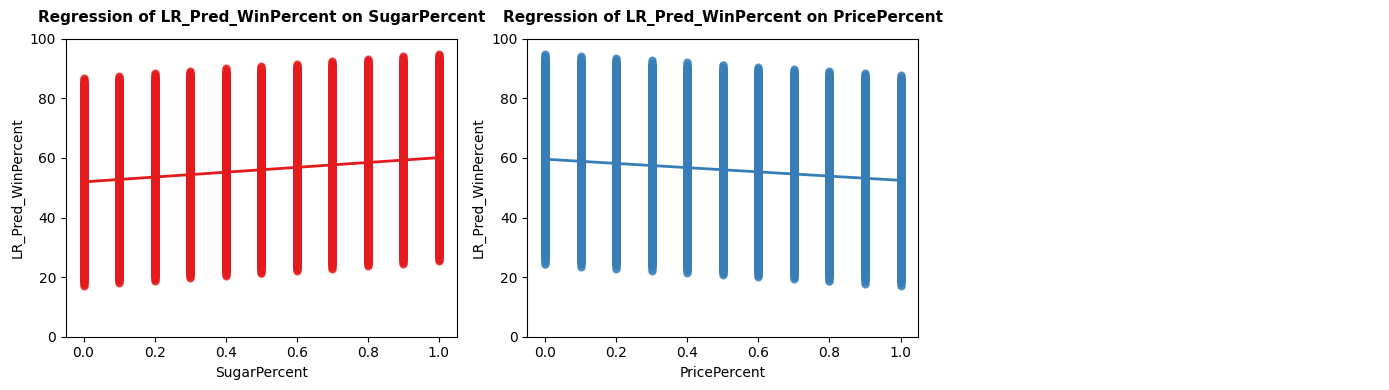

In [15]:
regplot_grid(design_space, ContinuousFeats, 'LR_Pred_WinPercent', 
             colors_dict, x_limits_dict=limits, y_limits_dict={"LR_Pred_WinPercent":[0, 100]})

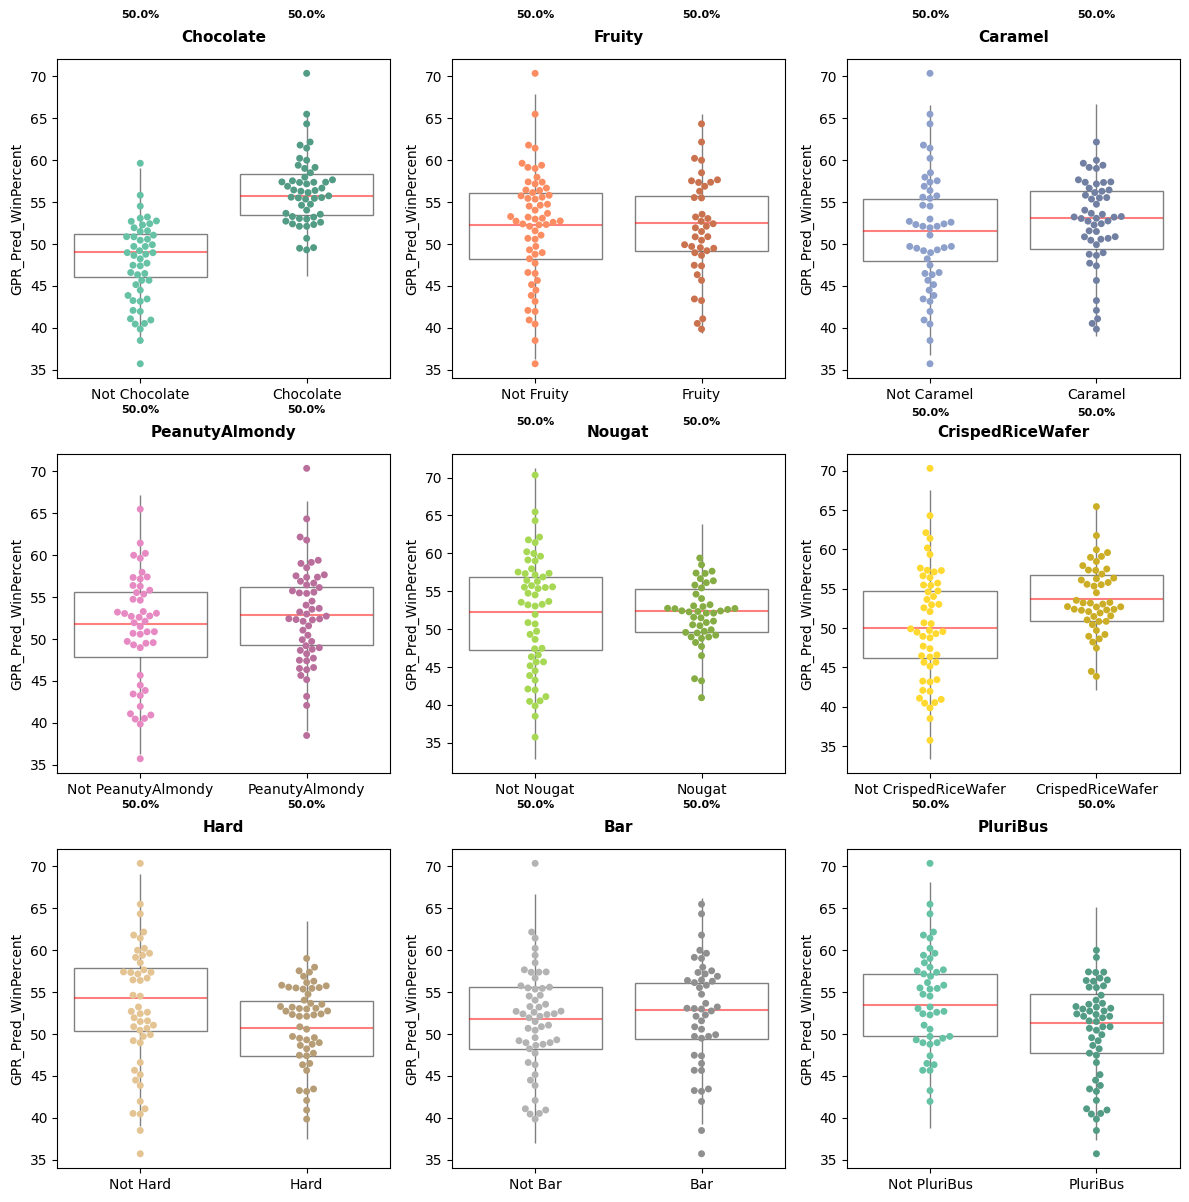

In [16]:
binary_columns = FlavorFeats + FormFeats

labels_dict = {
    col: [f"Not {col}", col] 
    for col in binary_columns
}
palette = sns.color_palette("Set2", n_colors=len(binary_columns))
def darken(color, amount=0.8): 
    r, g, b = color
    return (r * amount, g * amount, b * amount)

colors_dict = {
    col: [palette[i], darken(palette[i])]  # same palette but two shades
    for i, col in enumerate(binary_columns)
}

swarm_grid(design_space, binary_columns, 'GPR_Pred_WinPercent', 
           labels_dict, colors_dict, max_cols=3, figsize=(12, 4), sample_swarm_size=100)

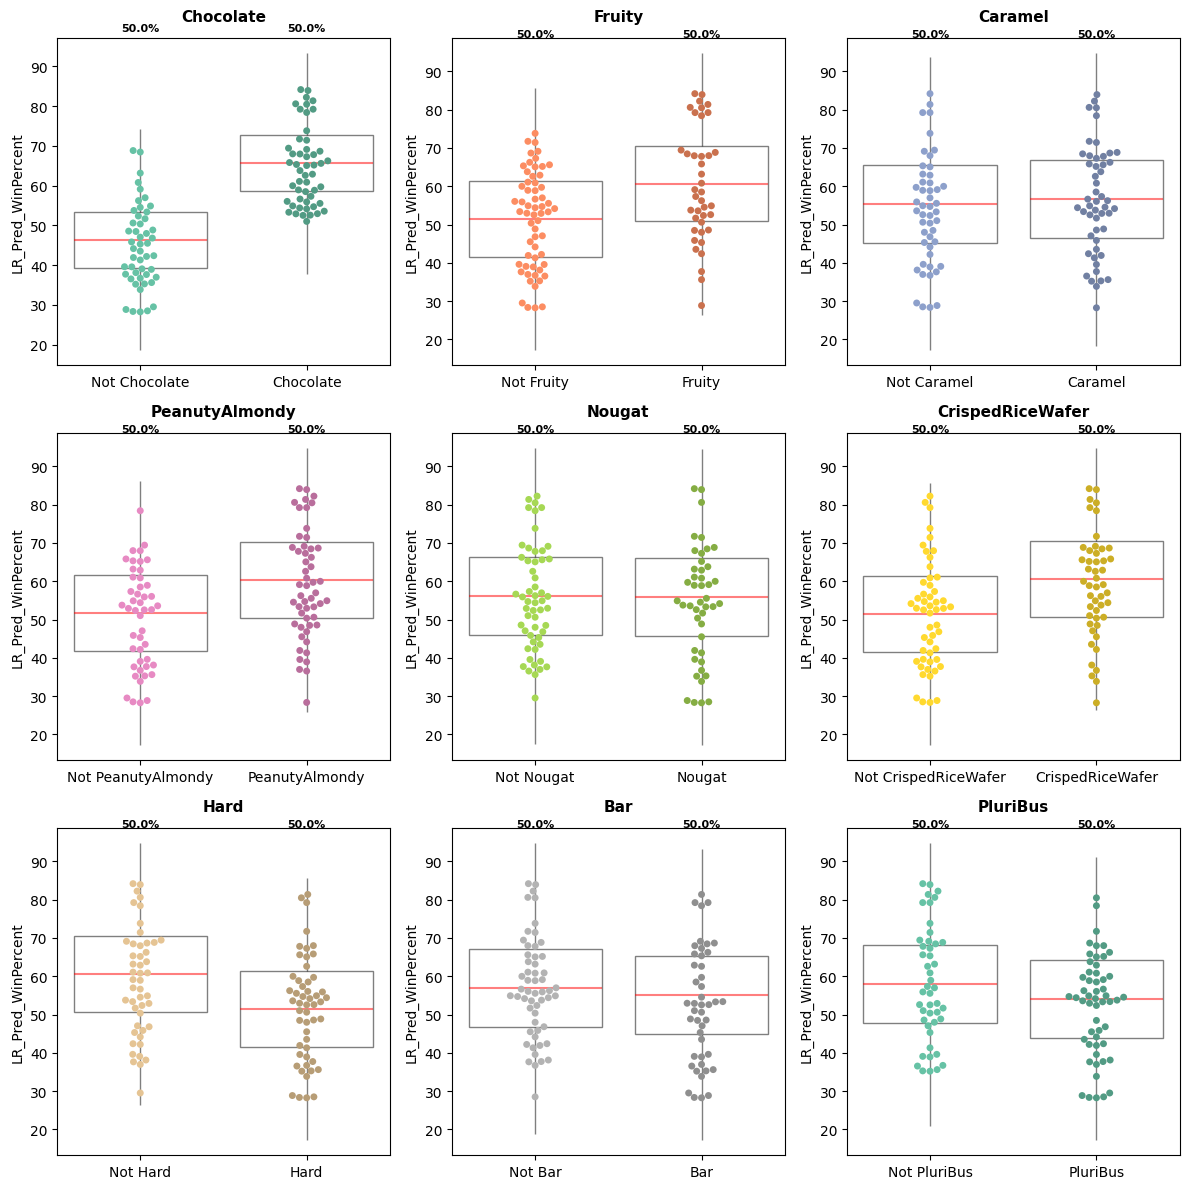

In [17]:
swarm_grid(design_space, binary_columns, 'LR_Pred_WinPercent', 
           labels_dict, colors_dict, max_cols=3, figsize=(12, 4), sample_swarm_size=100)

In [18]:
design_space['source'] = 'design_space'
df['source'] = 'exp_data'
df.loc[:, ['LR_Pred_WinPercent']] = MlModelPredictor().predict(df, Features, lr_model_experiment.model, 
                           lr_model_experiment.standard_scaler)
df.loc[:, 'GPR_Pred_WinPercent'], df.loc[:,'GPR_Pred_WinPercent_Std'] = MlModelPredictor().predict(df, Features, gpr_model_experiment.model, 
                           gpr_model_experiment.standard_scaler, return_std=True)
merged_df = pd.concat([df, design_space], ignore_index=True)

c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


In [19]:
merged_df = TSNEVisualiser().fit_data(merged_df, Features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 62037 samples in 0.340s...
[t-SNE] Computed neighbors for 62037 samples in 14.017s...
[t-SNE] Computed conditional probabilities for sample 1000 / 62037
[t-SNE] Computed conditional probabilities for sample 2000 / 62037
[t-SNE] Computed conditional probabilities for sample 3000 / 62037
[t-SNE] Computed conditional probabilities for sample 4000 / 62037
[t-SNE] Computed conditional probabilities for sample 5000 / 62037
[t-SNE] Computed conditional probabilities for sample 6000 / 62037
[t-SNE] Computed conditional probabilities for sample 7000 / 62037
[t-SNE] Computed conditional probabilities for sample 8000 / 62037
[t-SNE] Computed conditional probabilities for sample 9000 / 62037
[t-SNE] Computed conditional probabilities for sample 10000 / 62037
[t-SNE] Computed conditional probabilities for sample 11000 / 62037
[t-SNE] Computed conditional probabilities for sample 12000 / 62037
[t-SNE] Computed conditional probabilities for sa

Text(0.5, 1.0, 'Win Percent in 2 Dimensions')

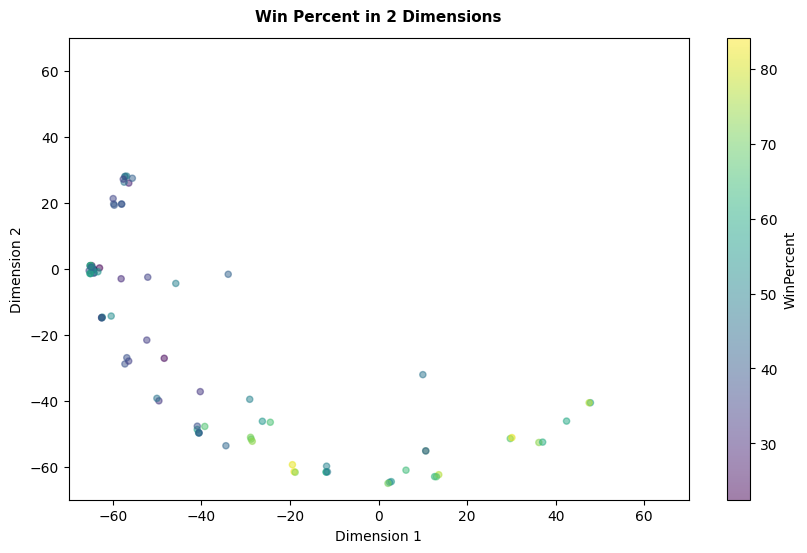

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
sc = ax.scatter(
    merged_df['projection_x'],
    merged_df['projection_y'],
    c=merged_df['WinPercent'],
    cmap='viridis',
    alpha=0.5,
    s=20
)
# Colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('WinPercent')
# # Labels and limits
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_xlim(-70, 70)
ax.set_ylim(-70, 70)
ax.set_title(f"Win Percent in 2 Dimensions", fontweight="bold", fontsize=11, pad=12)

Text(0.5, 1.0, 'GPR Predicted Win Percent in 2 Dimensions')

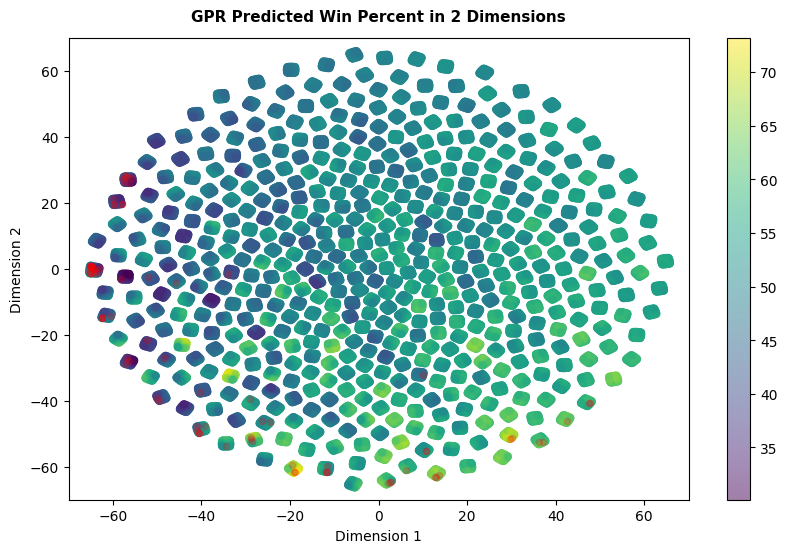

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
sc = ax.scatter(
    merged_df['projection_x'],
    merged_df['projection_y'],
    c=merged_df['GPR_Pred_WinPercent'],
    cmap='viridis',
    alpha=0.5,
    s=20
)

ax.scatter(
    merged_df[merged_df['source'] == 'exp_data']['projection_x'],
    merged_df[merged_df['source'] == 'exp_data']['projection_y'],
    color='red',     
    alpha=0.2,
    s=20,
)
cbar.set_label('GRP Predicted WinPercent')
cbar = plt.colorbar(sc, ax=ax)
# # Labels and limits
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_xlim(-70, 70)
ax.set_ylim(-70, 70)
ax.set_title(f"GPR Predicted Win Percent in 2 Dimensions", fontweight="bold", fontsize=11, pad=12)

Text(0.5, 1.0, 'LR Predicted Win Percent in 2 Dimensions')

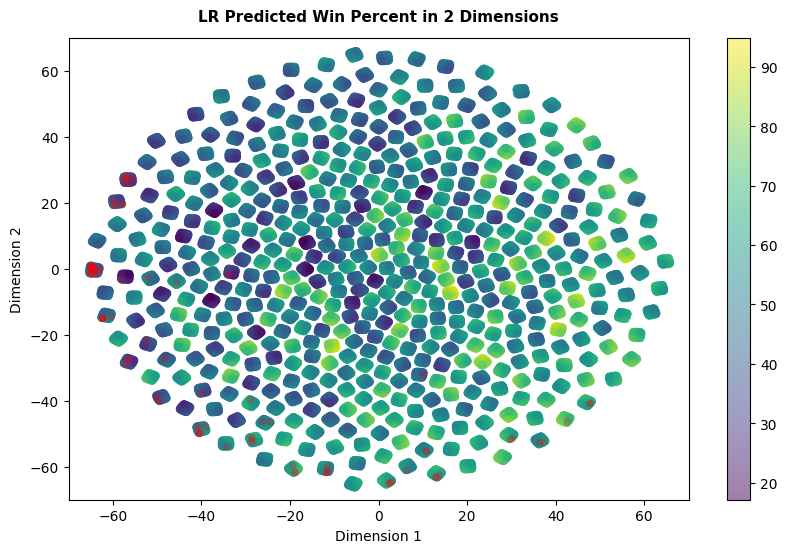

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
sc = ax.scatter(
    merged_df['projection_x'],
    merged_df['projection_y'],
    c=merged_df['LR_Pred_WinPercent'],
    cmap='viridis',
    alpha=0.5,
    s=20
)

ax.scatter(
    merged_df[merged_df['source'] == 'exp_data']['projection_x'],
    merged_df[merged_df['source'] == 'exp_data']['projection_y'],
    color='red',     
    alpha=0.2,
    s=20,
)
cbar.set_label('LR Predicted WinPercent')
cbar = plt.colorbar(sc, ax=ax)
# # Labels and limits
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_xlim(-70, 70)
ax.set_ylim(-70, 70)
ax.set_title(f"LR Predicted Win Percent in 2 Dimensions", fontweight="bold", fontsize=11, pad=12)

Text(0.5, 1.0, 'Recommendations in 2 Dimensions')

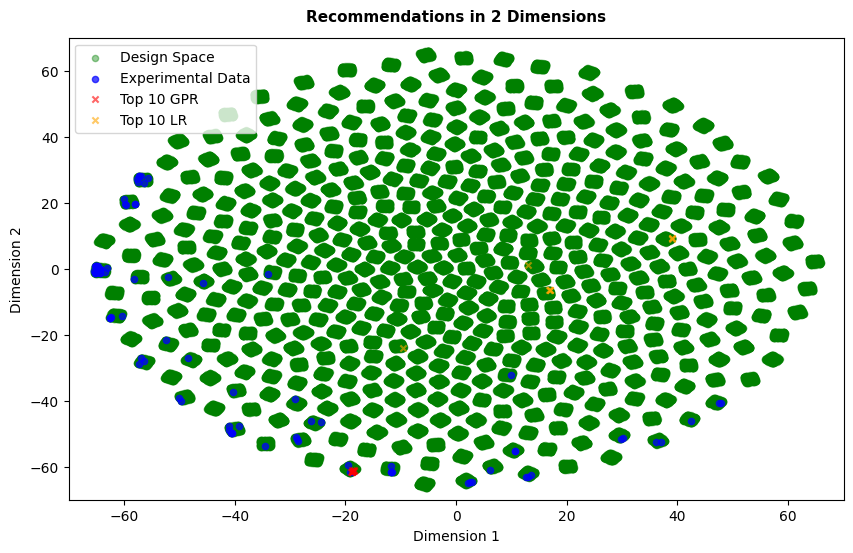

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
sc = ax.scatter(
    merged_df['projection_x'],
    merged_df['projection_y'],
    color='green',
    alpha=0.4,
    s=20,
    label ='Design Space'
)

ax.scatter(
    merged_df[merged_df['source'] == 'exp_data']['projection_x'],
    merged_df[merged_df['source'] == 'exp_data']['projection_y'],
    color='blue',     
    alpha=0.7,
    s=20,
    label='Experimental Data'
)

ax.scatter(
    merged_df[merged_df['GPR_Pred_Rank'] < 10]['projection_x'],
    merged_df[merged_df['GPR_Pred_Rank'] < 10]['projection_y'],
    color='red',     
    alpha=0.6,
    s=20,
    marker='x',
    label='Top 10 GPR'
)

ax.scatter(
    merged_df[merged_df['LR_Pred_Rank'] < 10]['projection_x'],
    merged_df[merged_df['LR_Pred_Rank'] < 10]['projection_y'],
    color='orange',     
    alpha=0.6,
    s=20,
    marker='x',
    label='Top 10 LR'
)

ax.legend()
# # Labels and limits
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_xlim(-70, 70)
ax.set_ylim(-70, 70)
ax.set_title(f"Recommendations in 2 Dimensions", fontweight="bold", fontsize=11, pad=12)